# simulation of proton2.1 efficiency for the detection of 511 keV $\gamma$-s emitted isotropically

where a "detected" $\gamma$ is defined as one that knocked-out an electron (Compton or PE-effect) that subsequently deposited more than 260 keV in the scintillator

last edit Mar-15, 2021

In [1]:
import sys; 
sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python'); 
from PETsys_analysis_tools import *;
sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python/BoxSi'); 
from proto21_tools import *;
%config InlineBackend.figure_format = 'retina'

In [2]:
main_data_path = '/Users/erezcohen/Desktop/data/PETsys/BoxSi_proto2.1/Geant4Sims/'

In [17]:
primaries = pd.read_csv(main_data_path + 'primaries_gamma511keV_atOrigin_allScintillators.csv')

In [18]:
detected = primaries[primaries.NScintillatorsFired>0]
detected_once = primaries[primaries.NScintillatorsFired==1]
detected_more_than_once = primaries[primaries.NScintillatorsFired>1]

In [19]:
p = float(len(detected))/len(primaries)
err = p*np.sqrt(1./len(detected) + 1./len(primaries))
P_detection = p
P_detection_err_dw = np.min([p, err])
P_detection_err_up = np.min([1-p, err])


p = float(len(detected_more_than_once))/len(detected)
if p>0:
    err = p*np.sqrt(1./len(detected_more_than_once) + 1/len(detected))
else:
    err = 0.01
P_CrossTalk = p
P_CrossTalk_err_dw = np.min([p, err])
P_CrossTalk_err_up = np.min([1-p, err])

In [20]:
if abs(P_detection_err_dw-P_detection_err_up)>0.01:
    print 'gamma efficiency: $%.1f^{+%.1f}_{-%.1f}'%(100*P_detection,100*P_detection_err_dw,100*P_detection_err_up),'%$'
else:
    print 'gamma efficiency: $%.1f\pm%.1f'%(100*P_detection,100*P_detection_err_dw),'%$'
    
if abs(P_CrossTalk_err_dw-P_CrossTalk_err_up)>0.01:
    print 'gamma cross talk probability: $%.1f^{+%.1f}_{-%.1f}'%(100*P_CrossTalk,100*P_CrossTalk_err_dw,100*P_CrossTalk_err_up),'%$'
else:
        print 'gamma cross talk probability: $%.1f\pm%.1f'%(100*P_CrossTalk,100*P_CrossTalk_err_dw),'%$'

gamma efficiency: $3.9\pm0.1 %$
gamma cross talk probability: $0.0\pm0.0 %$


## efficiency as a function of angles

In [21]:
bins = (np.linspace(5,175,35),np.linspace(-180,180,35))
hgen,edges_x,edges_y = np.histogram2d(primaries['theta_i/deg'],primaries['phi_i/deg'],bins=bins);
hdet1,edges_x,edges_y = np.histogram2d(detected_once['theta_i/deg'],detected_once['phi_i/deg'],bins=bins);
heff1 = hdet1/hgen
hdet2,edges_x,edges_y = np.histogram2d(detected_more_than_once['theta_i/deg'],detected_more_than_once['phi_i/deg'],bins=bins);
heff2 = hdet2/hgen

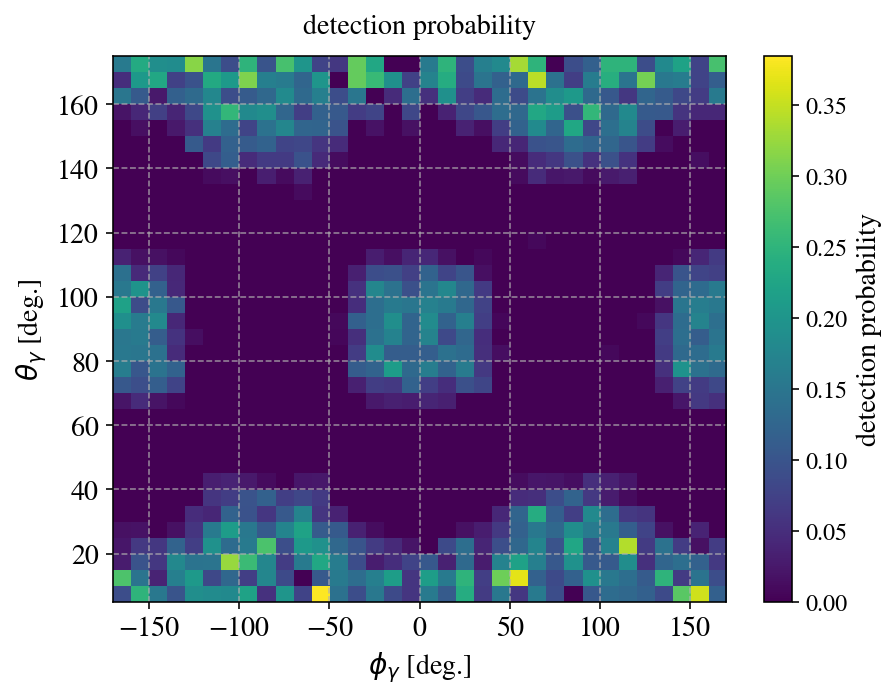

In [22]:
fig=plt.figure(figsize=(12,5));
ax = fig.add_subplot(1,2,1);
plt.imshow(heff1,extent=(-170,170,5,175))
set_axes(ax,x_label='$\\phi_{\\gamma}$ [deg.]',y_label='$\\theta_{\\gamma}$ [deg.]',title='detection probability',
         do_add_grid=True,do_add_legend=False,fontsize=14);
cbar=plt.colorbar()
cbar.set_label(label='detection probability',fontsize=14)
cbar.ax.tick_params(labelsize='large')

# ax = fig.add_subplot(1,2,2);
# plt.imshow(heff2,extent=(-170,170,5,175))
# set_axes(ax,x_label='$\\phi_{\\gamma}$ [deg.]',y_label='$\\theta_{\\gamma}$ [deg.]',title='cross-talk probability',
#          do_add_grid=True,do_add_legend=False,fontsize=14);
# cbar=plt.colorbar()
# cbar.set_label(label='cross-talk probability',fontsize=14)
# cbar.ax.tick_params(labelsize='large')

plt.tight_layout()